In [1]:
import pandas as pd
import numpy as np

In [2]:
filename="data/NIHMS778057-supplement-supp_table4.xlsx"
df = pd.read_excel(filename, 0)
df["phosSites"] = df["variableSites"].str.replace(' ', '')
df_all = df.set_index(["geneName", "phosSites"])

In [18]:
gene_df = df_all[df_all["numSpectraVMsiteObserved"] >= 30]
gene_df = gene_df.iloc[:,27:]
gene_df.head(20)

AO-A12D.01TCGA  C8-A131.01TCGA  AO-A12B.01TCGA  \
geneName phosSites                                                      
AHNAK    S1007s             -0.919089       -2.565861        0.177221   
         S1010s             -1.271514       -1.726458       -0.320742   
         S1042s             -2.298519       -0.370305       -1.169382   
         S1068s             -0.802335       -2.023904       -1.223738   
         S106s              -0.090999        0.637987        0.059744   
         S1088s              0.378180        0.693443        0.028183   
         S110s              -0.374236        1.003493        0.440229   
         S1123s             -1.777449       -0.403074        1.103011   
         S1135s             -0.986115       -2.107088       -0.110335   
         S1138s             -0.884495       -2.144899        0.126373   
         S115s              -1.355837       -2.187751       -1.058919   
         S1170s             -1.507185       -0.680355       -0.664406   
         S1196s             -4.192532       -2.704501       -1.846191   
         S1298s             -2.287709       -1.275247       -0.980016   
         S1324s             -1.094221       -2.154982        0.559460   
         S1344s             -0.640176       -0.624898       -1.598963   
         S135s               0.302506        0.892581        0.306972   
         S1391s              1.141407       -1.547486        0.620829   
         M1441mS1452s       -1.050978       -1.565131       -3.206822   
         S1452s             -0.919089       -2.545695       -2.321360   

                       E2-A10A.02TCGA  BH-A18Q.02TCGA  C8-A130.02TCGA  \
geneName phosSites                                                      
AHNAK    S1007s              0.203602       -0.086607       -2.700983   
         S1010s             -0.523359       -0.315189       -2.208631   
         S1042s              0.330244        0.819633       -0.419166   
         S1068s             -0.465794       -1.585542       -1.411369   
         S106s               0.540767       -0.909909        0.243135   
         S1088s             -4.867033       -1.963816        0.113174   
         S110s               0.386164        1.058329        0.298119   
         S1123s              0.754579        2.100100       -0.946508   
         S1135s                   NaN             NaN             NaN   
         S1138s             -0.307902       -0.986777       -1.813749   
         S115s               1.580222        0.067130       -1.236422   
         S1170s              2.519351        0.469679       -0.316697   
         S1196s              0.741421        0.495976       -0.134252   
         S1298s              2.001268        0.295713       -0.901522   
         S1324s              1.224966        0.220867       -0.666592   
         S1344s              1.200295       -0.729875       -0.956505   
         S135s              -1.253609       -1.263908       -2.226125   
         S1391s              0.167418       -0.250458       -2.516039   
         M1441mS1452s        1.547328        0.793335       -3.850639   
         S1452s             -0.409874       -2.564604       -1.386377   

                       C8-A138.03TCGA  E2-A154.03TCGA  BH-A0BZ.03TCGA  \
geneName phosSites                                                      
AHNAK    S1007s              1.301494        2.952304        1.403537   
         S1010s              1.820337        3.049420        0.372156   
         S1042s              1.570435        0.883498       -2.131714   
         S1068s              1.394314        2.412517        1.060454   
         S106s               0.137665        1.251637       -0.009285   
         S1088s              4.324115       -3.310578       -6.557703   
         S110s               0.568448        1.902091        1.132906   
         S1123s              0.670789        1.197432        1.160609   
         S1135s              3.115066        1.339719       -0.096654   
      

In [147]:
filtered_df = gene_df.loc["PGRMC1"].dropna(axis=1, how="any")
usecol = filtered_df.columns
filtered_gene_df = gene_df[usecol]
filt_df = filtered_gene_df.dropna(axis=0)
filt_df.to_csv("output/Phosphor_GCT_cleaned.csv")

In [254]:
agg_phos_df = filt_df.groupby("geneName").mean()
agg_phos_df.to_csv("data/Phosphor_agg.csv")

In [163]:
import json
# Read data from file:
CSNK2_DICT = json.load( open( "data/CSNK2_CLS.json" ) )
CKUP = []
CKDOWN = []
for key, value in CSNK2_DICT.items():
    if value == 0:
        CKUP.append(key)
    else:
        CKDOWN.append(key)


In [234]:
ckdf

phosSites,S181s,S57s,T74t
AO-A12D.01TCGA,2.036523,1.154380,2.752183
C8-A131.01TCGA,-0.007320,0.025450,0.343062
AO-A12B.01TCGA,-0.462766,0.112346,-0.215538
E2-A10A.02TCGA,-2.853910,-2.080898,-3.186141
BH-A18Q.02TCGA,-0.104812,0.773107,0.267393
...,...,...,...
AR-A1AQ.34TCGA,-3.980447,-1.997945,-2.662825
AO-A12B.34TCGA,-1.193453,0.373411,-0.745980
263d3f-I.CPTAC,-3.346223,-2.248704,-1.312644
blcdb9-I.CPTAC,1.547335,-0.176650,2.379830


In [246]:
ckdf = filt_df.loc["PGRMC1"].T

for col in ckdf.columns:
    ckdf[col + "_up"] = pd.to_numeric(ckdf[col].where(ckdf.index.isin(CKUP),np.nan), errors="coerce")
    ckdf[col + "_down"] = pd.to_numeric(ckdf[col].where(ckdf.index.isin(CKDOWN),np.nan), errors="coerce")
    ckdf = ckdf.drop(col, axis=1)

plot_df =ckdf.reset_index(drop=True)

In [228]:
_upck = upck.drop("patientID",axis=1).reset_index(drop=True)
_dock = dock.drop("patientID",axis=1).reset_index(drop=True)

In [233]:
upck

,T74t,subtypes
0,2.752183,Her2
1,0.343062,Basal
2,0.267393,Basal
3,-0.321795,Her2
4,2.326222,Her2
5,-0.260278,Luminal
6,-1.808189,Her2
7,-0.322864,Basal
8,-2.688983,Luminal
9,0.384889,Luminal


In [229]:
upck = _upck[["T74t", "subtypes"]]
dock = _dock[["T74t", "subtypes"]]

In [245]:
def boxplot_df(upck, prefix):
    plot_df = upck.groupby("subtypes").apply(lambda upck: upck.reset_index(drop=True)).unstack().T
    plot_df = plot_df.reset_index().drop(["level_0", "level_1"], axis=1)
    for col in plot_df.columns:
        plot_df[col + prefix] = pd.to_numeric(plot_df[col], errors='coerce')
        plot_df = plot_df.drop(col, axis=1)
    return plot_df

plot_up = boxplot_df(upck, "_up")
plot_do = boxplot_df(dock, "_down")
plot_df = plot_do.merge(plot_up, left_index=True, right_index=True, how="outer")

KeyError: 'subtypes'

In [231]:
plot_df = plot_df[["Basal_up", "Basal_down", "Luminal_up", "Luminal_down", "Her2_up", "Her2_down"]]

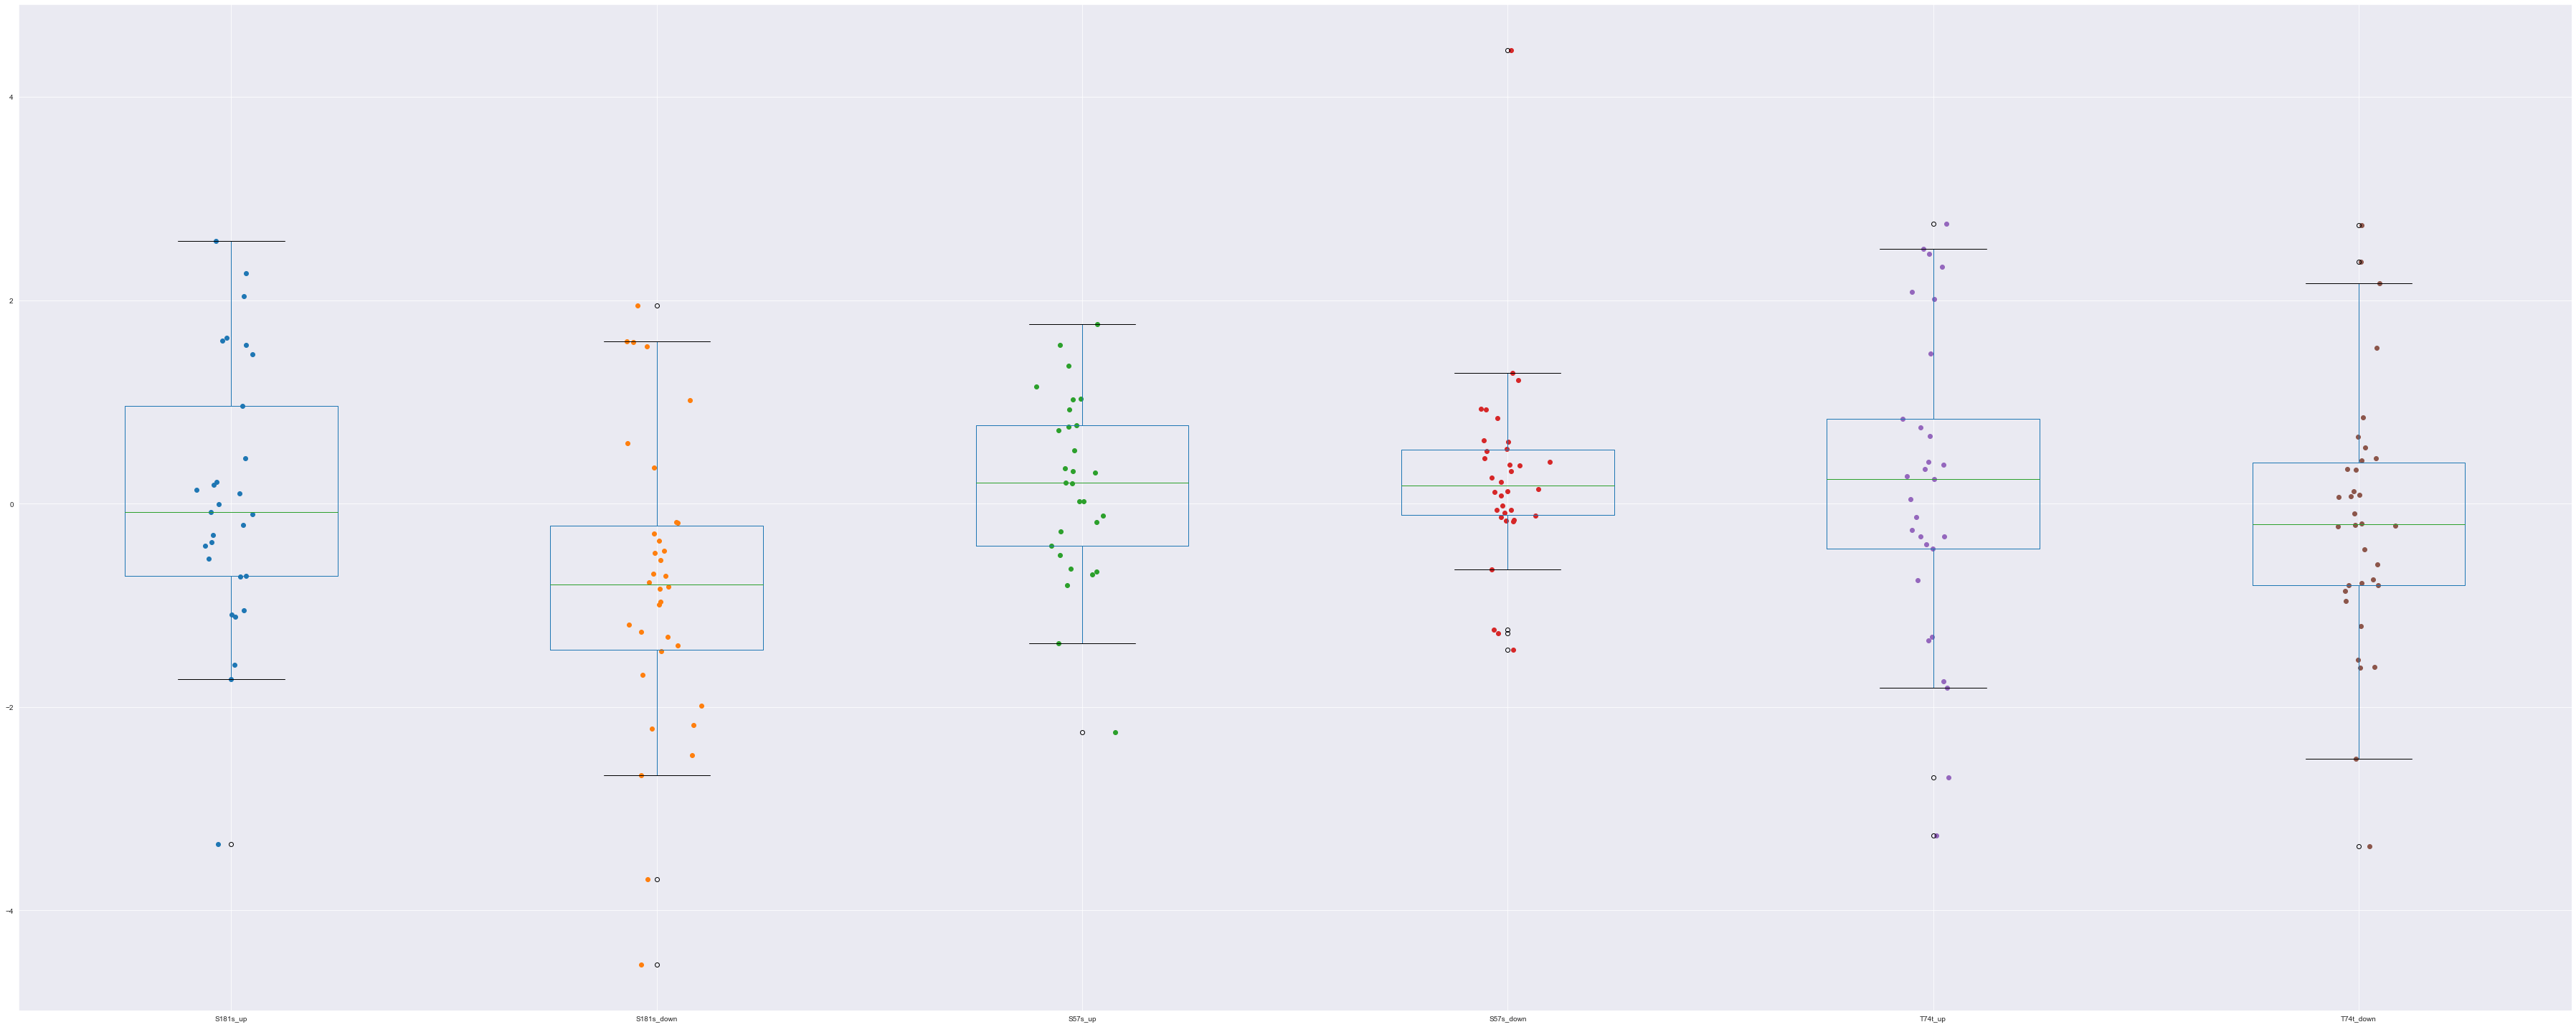

In [247]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [50,20]
plt.rcParams["figure.autolayout"] = True

plot_df.boxplot()
for i, d in enumerate(plot_df):
    y = plot_df[d]
    x = np.random.normal(i + 1, 0.04, len(y))
    plt.scatter(x,y)
    plt.savefig("CSNK2_ALL_UP_DOWN.png")
plt.show()

In [143]:
def get_samples_UpDown_regulating(df, target_index, save_to_csv=False):
    _df = df.loc[target_index]
    df = _df.T
    print(df)
    upreg = df.index[df[target_index] > 0]
    dowreg = df.index[df[target_index] < 0]
    classes = []
    for sample in _df.columns:
        if sample in upreg:
            classes.append(0)
        elif sample in dowreg:
            classes.append(1)
        else:
            print("not found ",sample)
    if len(target_index) > 1:
        filename = f"output/CLS_{target_index[0]}_{target_index[1]}.csv"
    else:
        filename = f"output/CLS_{target_index}.csv"
    df = pd.DataFrame(classes)
    if save_to_csv:
        df.to_csv(filename)
    return df

cls_s181 = get_samples_UpDown_regulating(filtered_gene_df, ("PGRMC1", "S181s"), save_to_csv=True)
cls_s57 = get_samples_UpDown_regulating(filtered_gene_df, ("PGRMC1", "S57s"), save_to_csv=True)
cls_t74 = get_samples_UpDown_regulating(filtered_gene_df, ("PGRMC1", "T74t"), save_to_csv=True)

    # cls_updow.to_csv("output/cls_updown.csv")

geneName          PGRMC1
phosSites          S181s
AO-A12D.01TCGA  2.036523
C8-A131.01TCGA -0.007320
AO-A12B.01TCGA -0.462766
E2-A10A.02TCGA -2.853910
BH-A18Q.02TCGA -0.104812
...                  ...
AR-A1AQ.34TCGA -3.980447
AO-A12B.34TCGA -1.193453
263d3f-I.CPTAC -3.346223
blcdb9-I.CPTAC  1.547335
c4155b-C.CPTAC -0.367965

[83 rows x 1 columns]
geneName          PGRMC1
phosSites           S57s
AO-A12D.01TCGA  1.154380
C8-A131.01TCGA  0.025450
AO-A12B.01TCGA  0.112346
E2-A10A.02TCGA -2.080898
BH-A18Q.02TCGA  0.773107
...                  ...
AR-A1AQ.34TCGA -1.997945
AO-A12B.34TCGA  0.373411
263d3f-I.CPTAC -2.248704
blcdb9-I.CPTAC -0.176650
c4155b-C.CPTAC -1.236050

[83 rows x 1 columns]
geneName          PGRMC1
phosSites           T74t
AO-A12D.01TCGA  2.752183
C8-A131.01TCGA  0.343062
AO-A12B.01TCGA -0.215538
E2-A10A.02TCGA -3.186141
BH-A18Q.02TCGA  0.267393
...                  ...
AR-A1AQ.34TCGA -2.662825
AO-A12B.34TCGA -0.745980
263d3f-I.CPTAC -1.312644
blcdb9-I.CPTAC  2.379830
c415

C:\Users\Lukasz\AppData\Local\Temp\ipykernel_8944\2795795063.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  _df = df.loc[target_index]
C:\Users\Lukasz\AppData\Local\Temp\ipykernel_8944\2795795063.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  _df = df.loc[target_index]
C:\Users\Lukasz\AppData\Local\Temp\ipykernel_8944\2795795063.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  _df = df.loc[target_index]


In [142]:
cls_UpDown

,0
0,0
1,1
2,1
3,1
4,1
...,...
78,1
79,1
80,1
81,0


In [28]:
pgrmc1_corr_df

geneName            AHNAK                                                    \
phosSites          S1007s    S1010s S1042s S1068s S106s S1088s S110s S1123s   
geneName phosSites                                                            
PGRMC1   S181s        NaN -0.214523    NaN    NaN   NaN    NaN   NaN    NaN   
         S57s         NaN       NaN    NaN    NaN   NaN    NaN   NaN    NaN   
         T74t         NaN       NaN    NaN    NaN   NaN    NaN   NaN    NaN   

geneName                             ...   NaN CYLC2      NaN  OC90  \
phosSites          S1135s    S1138s  ... S450s S230s S45sT46t T377t   
geneName phosSites                   ...                              
PGRMC1   S181s        NaN -0.221047  ...   NaN   NaN      NaN   NaN   
         S57s         NaN       NaN  ...   NaN   NaN      NaN   NaN   
         T74t         NaN       NaN  ...   NaN   NaN      NaN   NaN   

geneName                     TEX13B    VPS29      GRIK2  NaN          BACE1  
phosSites          M25mT29tY35yS40s C19cS21s S193sY195y S19s S281s T47tS59s  
geneName phosSites                                                           
PGRMC1   S181s                  NaN      NaN        NaN  NaN   NaN      NaN  
         S57s                   NaN      NaN        NaN  NaN   NaN      NaN  
         T74t                   NaN      NaN        NaN  NaN   NaN      NaN  

[3 rows x 22281 columns]

In [30]:
indice_slice = gene_df.index.get_locs(('PGRMC1',slice(None)))
new_index = gene_df.iloc[indice_slice]
mi = new_index.index

PGRMC1 Indices in array are [12420 12421 12422]

In [30]:
corr_matrix = np.corrcoef(gene_df.fillna(0).to_numpy())

C:\python_work\lib\site-packages\numpy\lib\function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\python_work\lib\site-packages\numpy\lib\function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [31]:
pgrmc1_corr_df = pd.DataFrame(corr_matrix[indice_slice,:], index=mi, columns=gene_df.index)
pgrmc1_corr = pgrmc1_corr_df.dropna(axis=1, how='all')

geneName               AHNAK                                          \
phosSites             S1007s    S1010s    S1042s    S1068s     S106s   
geneName phosSites                                                     
PGRMC1   S181s     -0.242760 -0.214523  0.421937 -0.438554 -0.075818   
         S57s      -0.072716 -0.134476  0.479146 -0.292896  0.029059   
         T74t      -0.188171 -0.260817  0.348045 -0.415665 -0.011871   

geneName                                                              ...  \
phosSites             S1088s     S110s    S1123s    S1135s    S1138s  ...   
geneName phosSites                                                    ...   
PGRMC1   S181s      0.615940 -0.036959 -0.236959 -0.116087 -0.221047  ...   
         S57s       0.481289  0.029936 -0.022401 -0.023126 -0.091232  ...   
         T74t       0.594551 -0.068682 -0.130422 -0.113628 -0.236196  ...   

geneName                 NaN     CYLC2       NaN      OC90           TEX13B  \
phosSites              S450s     S230s  S45sT46t     T377t M25mT29tY35yS40s   
geneName phosSites                                                            
PGRMC1   S181s      0.025025  0.563861  0.288663  0.431031         0.066526   
         S57s       0.070963  0.476021  0.256919  0.473966        -0.107920   
         T74t       0.167278  0.390179  0.036556  0.320928        -0.180630   

geneName               VPS29      GRIK2       NaN               BACE1  
phosSites           C19cS21s S193sY195y      S19s     S281s  T47tS59s  
geneName phosSites                                                     
PGRMC1   S181s      0.563585  -0.059683 -0.175348 -0.240239  0.039936  
         S57s       0.705020  -0.065631 -0.038289 -0.177705 -0.044466  
         T74t       0.523774   0.026071 -0.206688 -0.317634  0.039123  

[3 rows x 22281 columns]

In [31]:
corr_matrix_filtered = np.corrcoef(filtered_gene_df.to_numpy())
pgrmc1_peptide_corr = pd.DataFrame(corr_matrix_filtered[indice_slice,:], index=mi, columns=gene_df.index).dropna(axis=1, how="all")
# for i in range(len(pgrmc1_peptide_corr)):
#     print(pgrmc1_peptide_corr.iloc[i].describe())

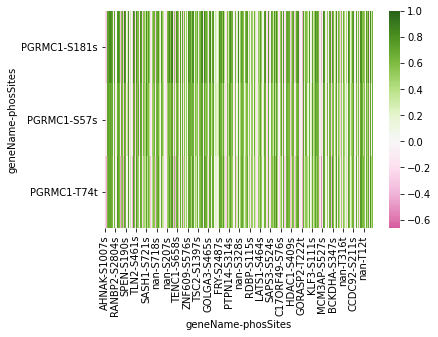

In [49]:
import seaborn as sns
ax = sns.heatmap(pgrmc1_peptide_corr, cmap="PiYG", center=0)

In [17]:
df.index

MultiIndex([(  'AHNAK',       'S1007s'),
            (  'AHNAK',       'S1010s'),
            (  'AHNAK',       'S1138s'),
            (  'AHNAK',        'S135s'),
            (  'AHNAK', 'M1441mS1452s'),
            (  'AHNAK',       'S1452s'),
            (  'AHNAK',       'S1580s'),
            (  'AHNAK',        'S210s'),
            (  'AHNAK',        'S216s'),
            (  'AHNAK',       'S2185s'),
            ...
            ('SLC35C2',        'S335s'),
            ('IGF2BP1',        'S181s'),
            ( 'STK17B',         'S10s'),
            ( 'SCAMP2',        'S320s'),
            (  'WDR85',        'S353s'),
            ( 'NECAP1',        'T211t'),
            ('ST8SIA3',        'S152s'),
            ( 'SNRPD3',          'S2s'),
            (  'DNAL1',         'S56s'),
            ( 'R3HCC1',         'S49s')],
           names=['geneName', 'phosSites'], length=4068)

In [18]:
df_corr = df_all.loc[df_phos_corr.index]   #from day 2 csv extracted index
df_corr = df_corr.iloc[:,27:]

# corr_col = pgrmc1_peptide_corr.columns
# df_corr = df.loc[corr_col]
# df_corr = df_corr.iloc[:,27:]

_ind = df_corr.index.get_locs(["PGRMC1"])
_col = df_corr.iloc[_ind].dropna(axis=1, how="any").columns
_df_corr = df_corr[_col]


In [19]:
from scipy.special import betainc

def corrcoef(matrix):
    r = np.corrcoef(matrix)
    rf = r[np.triu_indices(r.shape[0], 1)]
    df = matrix.shape[1] - 2
    ts = rf * rf * (df / (1 - rf * rf))
    pf = betainc(0.5 * df, 0.5, df / (df + ts))
    p = np.zeros(shape=r.shape)
    p[np.triu_indices(p.shape[0], 1)] = pf
    p[np.tril_indices(p.shape[0], -1)] = p.T[np.tril_indices(p.shape[0], -1)]
    p[np.diag_indices(p.shape[0])] = np.ones(p.shape[0])
    return r, p


df_corr = df_all.loc[df_phos_corr.index]   #from day 2 csv extracted index
df_corr = df_corr.iloc[:,27:]

# corr_col = pgrmc1_peptide_corr.columns
# df_corr = df.loc[corr_col]
# df_corr = df_corr.iloc[:,27:]

_ind = df_corr.index.get_locs(["PGRMC1"])
_col = df_corr.iloc[_ind].dropna(axis=1, how="any").columns
_df_corr = df_corr[_col]



arr = _df_corr.fillna(0).to_numpy()
#r, p = corrcoef(arr)
#_r[p > 0.05] = np.nan
p_pgrmc_1 = pd.DataFrame(p[_ind,:], index=_df_corr.iloc[_ind].index, columns=_df_corr.index).drop(np.nan, axis=1, level=0)
r_pgrmc_1 = pd.DataFrame(r[_ind,:], index=_df_corr.iloc[_ind].index, columns=_df_corr.index).drop(np.nan, axis=1, level=0)


df_pearson = pd.DataFrame({"Pears_PGRMC1_S181":r_pgrmc_1.iloc[0],"pValue_PGRMC1_S181":p_pgrmc_1.iloc[0],"Pears_PGRMC1_S57":r_pgrmc_1.iloc[1],"pValue_PGRMC1_S57":p_pgrmc_1.iloc[1],"Pears_PGRMC1_T74t":r_pgrmc_1.iloc[2], "pValue_PGRMC1_T74t":p_pgrmc_1.iloc[2]}, index=r_pgrmc_1.columns)

df_pearson.to_csv("output/PGRMC1_Phosphosite_correlating_Genes.csv")

pf.drop(np.nan, axis=1, level=0)
sign_pgrmc_pearson= r_pgrmc_1.dropna(axis=1, how="all").fillna(0)
correlating_proteins = pf.columns.droplevel(1).unique()

In [111]:
p_pgrmc_1 = pd.DataFrame(p[_ind,:], index=_df_corr.iloc[_ind].index, columns=_df_corr.index).drop(np.nan, axis=1, level=0)
r_pgrmc_1 = pd.DataFrame(r[_ind,:], index=_df_corr.iloc[_ind].index, columns=_df_corr.index).drop(np.nan, axis=1, level=0)


In [115]:
df_pearson = pd.DataFrame({"Pears_PGRMC1_S181":r_pgrmc_1.iloc[0],"pValue_PGRMC1_S181":p_pgrmc_1.iloc[0],"Pears_PGRMC1_S57":r_pgrmc_1.iloc[1],"pValue_PGRMC1_S57":p_pgrmc_1.iloc[1],"Pears_PGRMC1_T74t":r_pgrmc_1.iloc[2], "pValue_PGRMC1_T74t":p_pgrmc_1.iloc[2]}, index=r_pgrmc_1.columns)
df_pearson.to_csv("output/PGRMC1_Phosphosite_correlating_Genes.csv")


In [109]:
pf.drop(np.nan, axis=1, level=0)
sign_pgrmc_pearson= r_pgrmc_1.dropna(axis=1, how="all").fillna(0)
correlating_proteins = pf.columns.droplevel(1).unique()

geneName               AHNAK                                          \
phosSites             S1007s    S1010s     S135s    S1452s    S1580s   
geneName phosSites                                                     
PGRMC1   S181s      0.000000  0.000000  0.689764 -0.383186 -0.346296   
         S57s       0.000000  0.000000  0.630456  0.000000  0.000000   
         T74t      -0.295011 -0.323686  0.533337 -0.470823 -0.395598   

geneName                                                              ...  \
phosSites              S216s    S2185s    S2387s    S2708s    S3326s  ...   
geneName phosSites                                                    ...   
PGRMC1   S181s      0.361311 -0.399778  0.000000 -0.309431  0.000000  ...   
         S57s       0.332461  0.000000  0.000000  0.000000  0.000000  ...   
         T74t       0.000000 -0.446379 -0.302932 -0.384063 -0.390005  ...   

geneName               CPSF4    ZNF580     CDK10   SLC35C2   IGF2BP1  \
phosSites              S202s  S13sM19m     T196t     S335s     S181s   
geneName phosSites                                                     
PGRMC1   S181s      0.757674  0.790826  0.820387  0.452661  0.646338   
         S57s       0.669054  0.727241  0.758106  0.000000  0.494440   
         T74t       0.704551  0.700814  0.733947  0.446804  0.543366   

geneName              SCAMP2     WDR85    SNRPD3     DNAL1    R3HCC1  
phosSites              S320s     S353s       S2s      S56s      S49s  
geneName phosSites                                                    
PGRMC1   S181s      0.700339  0.000000  0.647245  0.513809  0.000000  
         S57s       0.716408  0.000000  0.652994  0.581767  0.000000  
         T74t       0.731501 -0.307364  0.600964  0.433084 -0.365218  

[3 rows x 2818 columns]

HTTPNotFound: 404 : Response specification matching http status_code 404 not found for operation Operation(getStudyUsingGET). Either add a response specification for the status_code or use a `default` response.

# Day 2. loading from PGRMC1_Correlations.csv

In [19]:
import numpy as np
import pandas as pd
usecol = df_all[df_all["numSpectraVMsiteObserved"] >= 30].iloc[:,27:].loc["PGRMC1"].dropna(axis=1, how="any").columns
df_phos_corr = pd.read_csv("output/PGRMC1_Phosphosite_correlating_Genes.csv", index_col=[0,1])
subtypes = pd.read_csv("data/subtypes_TCGA.csv")
subtypes["normed_index"] = [x[:12] for x in subtypes["pan.samplesID"]]
subtypes = subtypes.set_index("normed_index")
subtypes = subtypes[~subtypes.index.duplicated(keep='first')]

#### Format PhosphorData column names (sample_IDs) to match with subtype table syntax

In [20]:
df = df_all.loc[df_phos_corr.index]
df = df.iloc[:,27:]
sample_subtypes = {}

for column in list(df.columns):
    sample_id = "-".join([column[-4:], *column[:-4].split(".")])[:-3]
    if sample_id in subtypes.index:
        mrna_subtype = subtypes.loc[sample_id, "Subtype_mRNA"]
        sample_subtypes[column] = {"patientID":sample_id, "subtype":mrna_subtype}


Create template DataFrame transposing phosphor_df and by adding subtypes as grouping key

In [21]:
samples = []
patients = []
subtypes = []
for key, values in sample_subtypes.items():
    samples.append(key)
    patients.append(values["patientID"])
    subtypes.append(values["subtype"])
print(len(samples), len(patients), len(subtypes))
_df_tmpl = pd.DataFrame({"sampleID":samples,"patientID":patients,"subtypes":subtypes}).set_index("sampleID")
_df_tmpl

108 108 108


,patientID,subtypes
sampleID,,
AO-A12D.01TCGA,TCGA-AO-A12D,Her2
C8-A131.01TCGA,TCGA-C8-A131,Basal
AO-A12B.01TCGA,TCGA-AO-A12B,LumA
E2-A10A.02TCGA,TCGA-E2-A10A,LumA
BH-A18Q.02TCGA,TCGA-BH-A18Q,Basal
...,...,...
AO-A0JL.35TCGA,TCGA-AO-A0JL,Basal
BH-A0BV.35TCGA,TCGA-BH-A0BV,LumA
A2-A0YM.36TCGA,TCGA-A2-A0YM,Basal


### Merge subtype Template with phosphorproteom data

In [22]:
subtypes = _df_tmpl
subtypes["subtypes"][subtypes["subtypes"] == "LumB"] = "Luminal"
subtypes["subtypes"][subtypes["subtypes"] == "LumA"] = "Luminal"
subtypes

,patientID,subtypes
sampleID,,
AO-A12D.01TCGA,TCGA-AO-A12D,Her2
C8-A131.01TCGA,TCGA-C8-A131,Basal
AO-A12B.01TCGA,TCGA-AO-A12B,Luminal
E2-A10A.02TCGA,TCGA-E2-A10A,Luminal
BH-A18Q.02TCGA,TCGA-BH-A18Q,Basal
...,...,...
AO-A0JL.35TCGA,TCGA-AO-A0JL,Basal
BH-A0BV.35TCGA,TCGA-BH-A0BV,Luminal
A2-A0YM.36TCGA,TCGA-A2-A0YM,Basal


In [23]:
_df = df.T
_df = _df.loc[usecol]
_df.index.name = "sampleID"

merged = _df.merge(_df_tmpl, left_on="sampleID", right_index=True)
subtype_corr = merged.groupby("subtypes").corr()

C:\Users\Lukasz\AppData\Local\Temp\ipykernel_8944\3761128300.py:5: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  merged = _df.merge(_df_tmpl, left_on="sampleID", right_index=True)


In [36]:
pgrmc_peptide_multiindex = pd.MultiIndex.from_tuples([('PGRMC1', 'S181s'),
                                       ('PGRMC1',  'S57s'),
                                       ('PGRMC1',  'T74t')],
                                      names=['geneName', 'phosSites'])

In [39]:
pgrmc1_ind = list(pgrmc_peptide_multiindex)
subtype_corr.loc[(slice(None), pgrmc1_ind),:]

,,"(AHNAK, S1007s)","(AHNAK, S1010s)","(AHNAK, S1138s)","(AHNAK, S135s)","(AHNAK, M1441mS1452s)","(AHNAK, S1452s)","(AHNAK, S1580s)","(AHNAK, S210s)","(AHNAK, S216s)","(AHNAK, S2185s)",...,"(SLC35C2, S335s)","(IGF2BP1, S181s)","(STK17B, S10s)","(SCAMP2, S320s)","(WDR85, S353s)","(NECAP1, T211t)","(ST8SIA3, S152s)","(SNRPD3, S2s)","(DNAL1, S56s)","(R3HCC1, S49s)"
subtypes,,,,,,,,,,,,,,,,,,,,,,
Basal,"(PGRMC1, S181s)",-0.316366,-0.389957,-0.479578,0.901314,-0.000585,-0.513652,-0.518492,-0.071111,0.245361,-0.534760,...,0.538229,0.706763,-0.060456,0.781346,-0.350209,-0.162131,-0.047904,0.822566,0.731288,-0.362282
Her2,"(PGRMC1, S181s)",0.024992,-0.193362,0.001303,0.800034,0.253641,-0.344259,-0.179962,0.066235,0.734529,-0.376041,...,0.459060,0.584298,-0.061334,0.671345,-0.528206,-0.336896,0.050966,0.575303,0.499100,-0.319116
Luminal,"(PGRMC1, S181s)",-0.482554,-0.215504,-0.254610,0.593612,-0.108983,-0.457194,-0.454493,0.060992,0.394632,-0.529701,...,0.425550,0.720630,-0.180116,0.736091,-0.268844,-0.179947,-0.401274,0.645174,0.534286,-0.209931
Normal,"(PGRMC1, S181s)",-0.623272,-0.293611,-0.451028,-0.177004,-0.296150,-0.685191,-0.507220,-0.847317,-0.644502,-0.313582,...,0.999998,0.083256,-0.784429,-0.040602,0.033558,-0.795069,0.994813,-0.522127,-0.881726,-0.981951
Basal,"(PGRMC1, S57s)",-0.280941,-0.369480,-0.459964,0.543109,-0.028981,-0.511414,-0.471128,0.122230,0.329062,-0.506537,...,0.455568,0.632437,0.106659,0.810087,-0.313659,0.010154,-0.116775,0.773700,0.742421,-0.300100
Her2,"(PGRMC1, S57s)",-0.011774,-0.103555,0.118177,0.852392,0.095300,-0.180717,0.063476,0.176495,0.693311,-0.150263,...,0.262473,0.571444,-0.130615,0.696281,-0.469476,-0.246256,0.129217,0.715347,0.598341,-0.271436
Luminal,"(PGRMC1, S57s)",-0.201052,-0.127374,-0.059196,0.597610,-0.052113,-0.304592,-0.282979,0.235930,0.315276,-0.305699,...,0.195370,0.524759,-0.103545,0.716869,-0.208062,-0.078417,-0.186740,0.654313,0.591032,-0.145147
Normal,"(PGRMC1, S57s)",-0.251359,0.120540,-0.049061,0.238571,0.117901,-0.329742,-0.112879,-0.558086,-0.277831,0.099707,...,0.912792,-0.329226,-0.968867,0.369269,0.437125,-0.479676,0.867456,-0.823855,-0.997376,-0.820155
Basal,"(PGRMC1, T74t)",-0.440130,-0.702188,-0.737655,0.645777,-0.338726,-0.745548,-0.712736,-0.314039,0.185567,-0.670356,...,0.458596,0.590168,-0.194005,0.845866,-0.477746,-0.155884,-0.164013,0.814458,0.732611,-0.433671


In [42]:
normed_subtypes = merged.groupby("subtypes")[pgrmc1_ind].agg(["min","max","mean"])

In [43]:
normed_subtypes

PGRMC1                                                    \
             S181s                          S57s                       
               min       max      mean       min       max      mean   
subtypes                                                               
Basal    -8.261281  1.628964 -1.772178 -5.653189  1.033182 -0.692529   
Her2     -6.409865  2.262491 -1.114943 -3.223440  1.154380 -0.322759   
Luminal  -8.255664  1.949703 -1.696350 -3.361832  4.456982 -0.258669   
Normal   -0.688246  2.581105  0.567060  0.446851  1.355284  0.910679   

                                        
              T74t                      
               min       max      mean  
subtypes                                
Basal    -4.811310  2.504991 -0.407917  
Her2     -5.460923  2.752183 -0.990569  
Luminal  -6.076887  2.078599 -0.990373  
Normal   -0.597703  0.661458 -0.049616

In [44]:
mf = merged[pgrmc1_ind]
mf

,"(PGRMC1, S181s)","(PGRMC1, S57s)","(PGRMC1, T74t)"
sampleID,,,
AO-A12D.01TCGA,2.036523,1.154380,2.752183
C8-A131.01TCGA,-0.007320,0.025450,0.343062
AO-A12B.01TCGA,-0.462766,0.112346,-0.215538
E2-A10A.02TCGA,-2.853910,-2.080898,-3.186141
BH-A18Q.02TCGA,-0.104812,0.773107,0.267393
...,...,...,...
BH-A0DD.33TCGA,-2.672738,-0.130507,0.421692
BH-A0E9.33TCGA,-1.449480,0.140233,0.334627
AR-A0TT.34TCGA,-1.725883,-0.671512,-3.263303


In [45]:
df_proteomics = pd.read_excel("data/NIHMS778057-supplement-supp_table3.xlsx", 1)

In [46]:
df_proteomics = df_proteomics.set_index("geneName")


In [ ]:
def remove_genes(df):


In [65]:
df_prot

,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,A2-A0EX.04TCGA,AO-A12D.05TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
geneName,,,,,,,,,,,,,,,,,,,,,
PLEC,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,1.407570,1.185108,1.100688,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
NaN,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,1.407570,1.192612,1.100688,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
PLEC,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,1.410312,1.188860,1.100688,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
NaN,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,1.407570,1.185108,1.100688,...,-0.935355,-0.487772,-0.10668,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
NaN,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,1.413053,1.200116,1.093358,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,-16.029761,1.729692,4.107251,-9.584499,-5.196859,-6.101005,-2.578828,...,-6.662350,NaN,NaN,NaN,NaN,NaN,NaN,-8.020071,-3.093822,-4.602418
NaN,NaN,NaN,NaN,-2.046065,-0.425182,-3.203370,-4.786183,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049608,-0.646977,0.240590
COX8A,NaN,NaN,NaN,-1.778435,-0.149673,1.971481,-3.103949,-0.933726,-1.726336,1.294925,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df_prot = df_proteomics.iloc[:,11:]
_df_prot = df_prot.reset_index().drop_duplicates(subset="geneName", keep="first")

In [72]:
_df_prot = _df_prot.set_index("geneName", drop=True)

In [73]:
d = _df_prot.loc["PGRMC1"].T

d = pd.DataFrame(d)

_d = d.merge(subtypes, left_index=True, right_index=True)

_d

,PGRMC1,patientID,subtypes
AO-A12D.01TCGA,3.614408,TCGA-AO-A12D,Her2
C8-A131.01TCGA,0.577907,TCGA-C8-A131,Basal
AO-A12B.01TCGA,-2.879779,TCGA-AO-A12B,Luminal
BH-A18Q.02TCGA,-0.865145,TCGA-BH-A18Q,Basal
C8-A130.02TCGA,0.873646,TCGA-C8-A130,Luminal
...,...,...,...
AO-A0JL.35TCGA,-2.452057,TCGA-AO-A0JL,Basal
BH-A0BV.35TCGA,-2.966684,TCGA-BH-A0BV,Luminal
A2-A0YM.36TCGA,-0.522707,TCGA-A2-A0YM,Basal
BH-A0C7.36TCGA,-3.187377,TCGA-BH-A0C7,Luminal


In [180]:
from scipy import stats
z_score = stats.zscore(d)

abs_z_scores = np.abs(z_score)
filtered_entries = (abs_z_scores < 2).all(axis=1)
new_df = d[filtered_entries]
zdf = new_df.merge(subtypes, right_index=True, left_index=True)
zdf.groupby("subtypes").agg(["min","max","mean","count"])

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U11'), dtype('<U11')) -> None

In [200]:
plot_df = zdf.groupby("subtypes")["PGRMC1"].apply(lambda zdf: zdf.reset_index(drop=True)).unstack().T
plot_df

subtypes,Basal,Her2,Luminal,Normal
0,0.577907,2.403024,-2.879779,-3.086564
1,-0.865145,-0.336065,0.873646,0.018168
2,-1.208221,-4.182864,-3.608243,2.718394
3,0.969938,-0.296508,-0.469462,NaN
4,-0.492972,-2.947059,0.975059,NaN
5,-0.755462,0.545406,-1.869681,NaN
6,-1.514553,-4.406457,-1.099184,NaN
7,-0.820547,0.730382,2.935188,NaN
8,-0.346992,-0.394782,-1.213183,NaN
9,2.115524,NaN,-1.613485,NaN


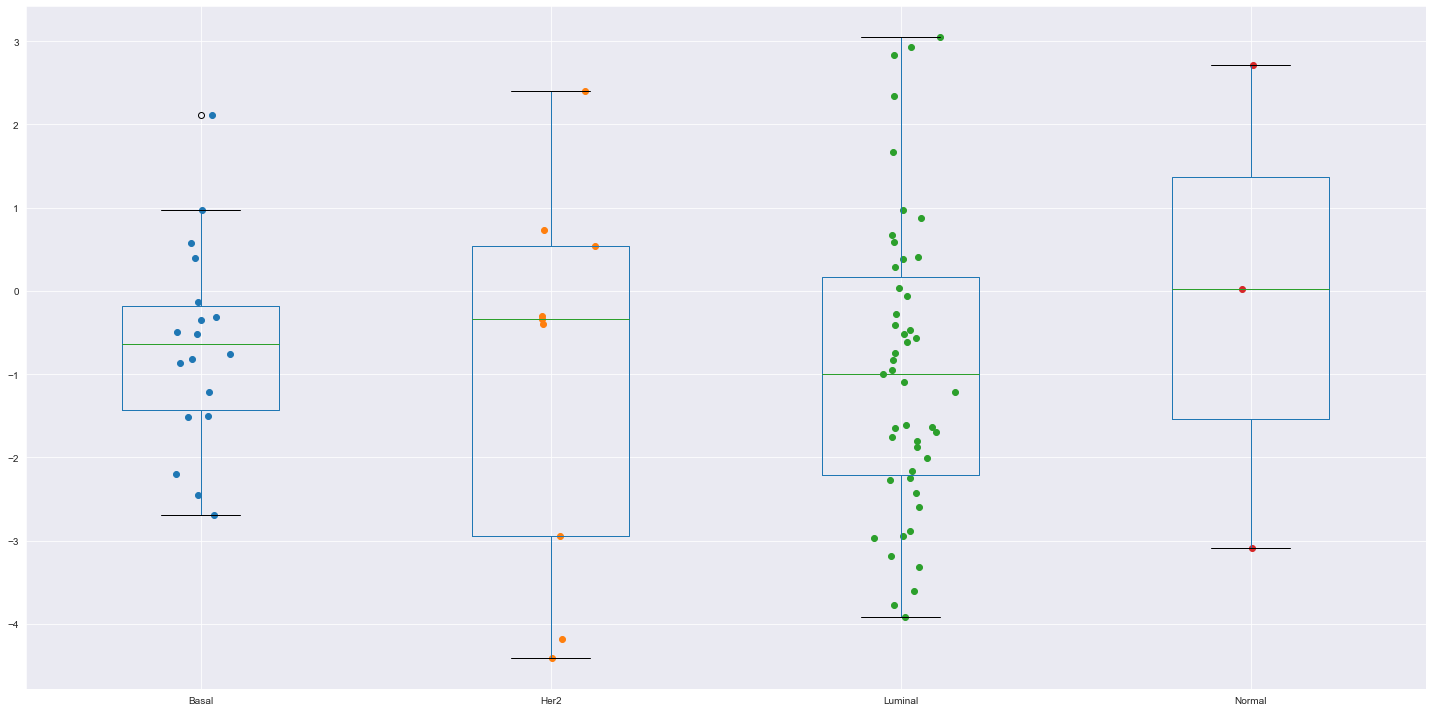

In [76]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [20,10]
plt.rcParams["figure.autolayout"] = True

plot_df.boxplot()
for i, d in enumerate(plot_df):
    y = plot_df[d]
    x = np.random.normal(i + 1, 0.04, len(y))
    plt.scatter(x,y)
plt.show()


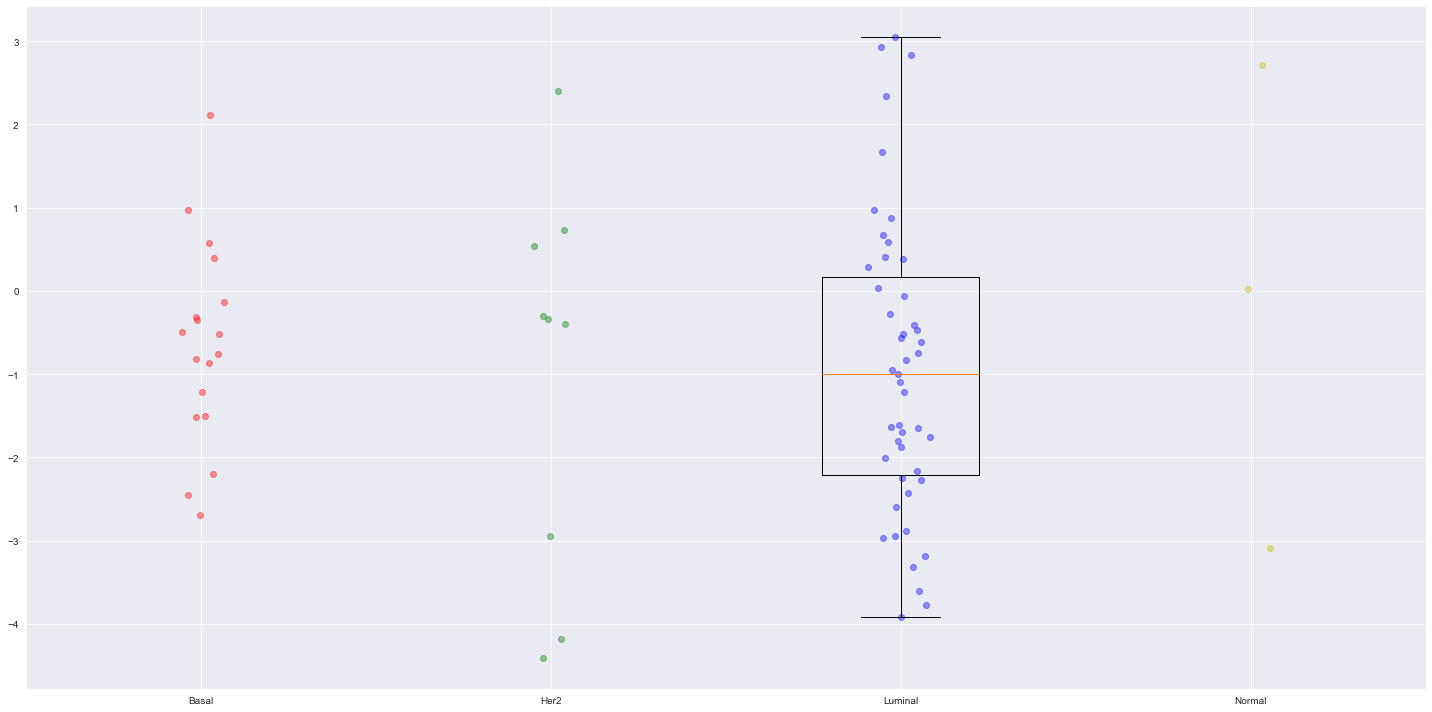

In [77]:
vals, names, xs = [],[],[]

for i, col in enumerate(plot_df.columns):
    vals.append(plot_df[col].values)
    names.append(col)
    xs.append(np.random.normal(i +1, 0.04, plot_df[col].values.shape[0]))

plt.boxplot(vals, labels=names)
palette = ['r', 'g', 'b', 'y']
for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, color=c)
plt.show()


In [53]:
df_prot.columns

,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,A2-A0EX.04TCGA,AO-A12D.05TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
geneName,,,,,,,,,,,,,,,,,,,,,
PLEC,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,1.407570,1.185108,1.100688,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
NaN,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,1.407570,1.192612,1.100688,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
PLEC,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,1.410312,1.188860,1.100688,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
NaN,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,1.407570,1.185108,1.100688,...,-0.935355,-0.487772,-0.10668,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
NaN,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,1.413053,1.200116,1.093358,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,-16.029761,1.729692,4.107251,-9.584499,-5.196859,-6.101005,-2.578828,...,-6.662350,NaN,NaN,NaN,NaN,NaN,NaN,-8.020071,-3.093822,-4.602418
NaN,NaN,NaN,NaN,-2.046065,-0.425182,-3.203370,-4.786183,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049608,-0.646977,0.240590
COX8A,NaN,NaN,NaN,-1.778435,-0.149673,1.971481,-3.103949,-0.933726,-1.726336,1.294925,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
#df_prot = df_proteomics.loc[:,usecol]
norm_prgmc1 = mf.div(d, axis=0)
merged_normed = norm_prgmc1.merge(_df_tmpl, left_index=True, right_index=True)
normed_subtypes = merged_normed.groupby("subtypes")[pgrmc1_ind].agg(["min","max","mean"])



In [78]:
from scipy.special import betainc

def corrcoef(matrix):
    r = np.corrcoef(matrix)
    rf = r[np.triu_indices(r.shape[0], 1)]
    df = matrix.shape[1] - 2
    ts = rf * rf * (df / (1 - rf * rf))
    pf = betainc(0.5 * df, 0.5, df / (df + ts))
    p = np.zeros(shape=r.shape)
    p[np.triu_indices(p.shape[0], 1)] = pf
    p[np.tril_indices(p.shape[0], -1)] = p.T[np.tril_indices(p.shape[0], -1)]
    p[np.diag_indices(p.shape[0])] = np.ones(p.shape[0])
    return r, p




# corr_col = pgrmc1_peptide_corr.columns
# df_corr = df.loc[corr_col]
# df_corr = df_corr.iloc[:,27:]

_ind = _df_prot.index.get_loc("PGRMC1")
_df_prot = _df_prot



arr = _df_prot.fillna(0).to_numpy()
r, p = corrcoef(arr)
_r = r
_r[p > 0.05] = np.nan
# p_pgrmc_1 = pd.DataFrame(p[_ind,:], index=_df_prot.iloc[_ind].index, columns=_df_prot.index).drop(np.nan, axis=1, level=0)
# r_pgrmc_1 = pd.DataFrame(_r[_ind,:], index=_df_prot.iloc[_ind].index, columns=_df_prot.index).drop(np.nan, axis=1, level=0)


In [83]:
arr

array([[ 1.09613118,  2.60994298, -0.65982805, ...,  0.59858451,
        -0.19128453,  0.56697529],
       [ 1.11137037,  2.65042179, -0.64874215, ...,  0.60669746,
        -0.18391768,  0.5787017 ],
       [ 0.48275368, -1.0452935 ,  1.22200271, ...,  2.77826341,
         1.36732983,  3.21518977],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.63351718,  4.84032537, -1.96519224, ...,  0.01986083,
        -1.71832668, -0.36918318],
       [12.66648821,  0.14073561, -2.85483536, ...,  0.        ,
         0.        ,  0.        ]])

In [103]:
r

array([[       nan, 0.99992351, 0.27149366, ...,        nan, 0.31167766,
               nan],
       [0.99992351,        nan, 0.27265398, ...,        nan, 0.31203808,
               nan],
       [0.27149366, 0.27265398,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
        0.25321986],
       [0.31167766, 0.31203808,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ..., 0.25321986,        nan,
               nan]])

In [104]:
pears = pd.DataFrame(_r[_ind,:], index=_df_prot.index)
pval = pd.DataFrame(p[_ind,:], index=_df_prot.index)
pears

,0
geneName,
PLEC,0.241772
NaN,0.237538
AHNAK,NaN
DYNC1H1,0.464997
MACF1,NaN
...,...
FKBP6,0.300539
OTUD6A,NaN
COX8A,0.429184


In [99]:
df_pearson

,Pears_PGRMC1,pValue
geneName,,
PLEC,0.241772,0.027664
NaN,0.237538,0.030595
AHNAK,NaN,0.060636
DYNC1H1,0.464997,0.000009
MACF1,NaN,0.858206
...,...,...
FKBP6,0.300539,0.005769
OTUD6A,NaN,0.208114
COX8A,0.429184,0.000052


In [105]:
df_pearson = pd.DataFrame({"Pears_PGRMC1":pears.to_numpy().squeeze(),"pValue":pval.to_numpy().squeeze()}, index=pears.index)


#
# pf.drop(np.nan, axis=1, level=0)
# sign_pgrmc_pearson= r_pgrmc_1.dropna(axis=1, how="all").fillna(0)
# correlating_proteins = pf.columns.droplevel(1).unique()

In [106]:
df_pearson

,Pears_PGRMC1,pValue
geneName,,
PLEC,0.241772,0.027664
NaN,0.237538,0.030595
AHNAK,NaN,0.060636
DYNC1H1,0.464997,0.000009
MACF1,NaN,0.858206
...,...,...
FKBP6,0.300539,0.005769
OTUD6A,NaN,0.208114
COX8A,0.429184,0.000052


In [118]:
corr_prots = df_pearson.dropna(axis=0)

# PGRMC1 Correlating Genes with pvalue < 0.005 and pearson > 0.5 or <-0.5

In [248]:
pgrmc1_cocorr = corr_prots.where(abs(corr_prots["Pears_PGRMC1"]) >= 0.5, np.nan).dropna(axis=0)

In [250]:
pgrmc1_cocorr.to_csv("output/Correlating_Genes_0_5Pearson.csv")

In [129]:
pgrmc1_pos_corr = pgrmc1_cocorr[pgrmc1_cocorr["Pears_PGRMC1"] > 0]
pgrmc1_neg_corr = pgrmc1_cocorr[pgrmc1_cocorr["Pears_PGRMC1"] < 0]

In [134]:
list(pgrmc1_neg_corr.index)

['EPS15L1',
 'SPATA5',
 'HBB',
 'HBD',
 'HBG1',
 'HBG2',
 'HBE1',
 'FCHO2',
 'HNRNPH1',
 'SNX5',
 'SNX32',
 'ARL3',
 'PRDX6',
 'ATP5B',
 'TUBG2',
 'PGAM4',
 'GRHPR',
 'COPS4',
 'SPATA5L1',
 'PRDX2',
 'HIST1H2BN',
 'HIST1H2BM',
 'HIST3H2BB',
 'HS1BP3',
 'ZNF268',
 'POLB',
 'RPRD1A',
 'PCBP1',
 'PPIAL3',
 'AIDA',
 'ESD',
 'C12ORF10',
 'TBC1D13',
 'CA1',
 'UBAP1',
 'UROD',
 'C22ORF25',
 'RNASEH2A',
 'CLYBL',
 'UBAC1',
 'ECHDC1',
 'CAMK1',
 'DDB2',
 'NUP62',
 'PDXP',
 'SPIN2B',
 'ENOPH1',
 'WDR61',
 'HTRA2',
 'CBX1',
 'HDHD2',
 'DAZAP1',
 'ITPK1',
 'PSMB3',
 'RPA2',
 'PSMA5',
 'GPX1',
 'IAH1',
 'PIN1',
 'POLR2C',
 'NFATC2IP',
 'HPRT1',
 'DHRS11',
 'CA3',
 'NUDT16',
 'CUTC',
 'EIF1',
 'EIF1B',
 'PDDC1',
 'COMMD10',
 'POLR2D',
 'TRAPPC4',
 'TAF9',
 'COMMD9',
 'ADHFE1',
 'LSM1',
 'DSCR3',
 'SNX21',
 'PCBD1',
 'DUSP3',
 'RNASEH2C',
 'PFDN5',
 'RPA3',
 'ACYP1',
 'LSM12',
 'CINP',
 'COMMD8',
 'LYSMD1',
 'WISP2',
 'DYNLRB1',
 'COPS8',
 'UBE2B',
 'MAPKSP1',
 'HSPB11',
 'CCDC53',
 'CUTA',
 'FAM128B

In [133]:
list(pgrmc1_pos_corr.index)

['DYNC1H1',
 'SYNE2',
 'PRKDC',
 'GOLGB1',
 'UBR4',
 'HUWE1',
 'GCN1L1',
 'TPR',
 'EIF3A',
 'PRPF8',
 'EPRS',
 'BAT2L2',
 'BAT2',
 'CHD4',
 'USP9Y',
 'MDN1',
 'COPA',
 'LRRK2',
 'TOP2B',
 'IGF2R',
 'ASCC3',
 'TTBK1',
 'KRT78',
 'SPEN',
 'SF3B1',
 'MYO9B',
 'EIF4G1',
 'SMG1',
 'NBAS',
 'ITPR3',
 'ITPR2',
 'EIF5B',
 'PDS5A',
 'KIF5B',
 'KIF5A',
 'MIA3',
 'ZNF638',
 'NUP205',
 'RRBP1',
 'CHD2',
 'PRPF6',
 'BAZ1B',
 'TANC1',
 'CYFIP1',
 'ARID1A',
 'THOC2',
 'MYBBP1A',
 'SMARCA4',
 'HIP1R',
 'CUL4B',
 'RBBP6',
 'ZNFX1',
 'SLTM',
 'NCL',
 'XRN1',
 'SYMPK',
 'KIAA0664',
 'THRAP3',
 'RBM25',
 'GLG1',
 'CANX',
 'CLGN',
 'TCOF1',
 'KIF7',
 'CUX1',
 'NUP93',
 'MGA',
 'ATP2A2',
 'ATP2A3',
 'ATP2A1',
 'CAMSAP1',
 'CKAP4',
 'TOP1',
 'TOP1MT',
 'EIF3C',
 'EIF3CL',
 'RBMX',
 'ZCCHC6',
 'RBM6',
 'MARK2',
 'ATP1A1',
 'ATP1A2',
 'ATP1A4',
 'ATP4A',
 'XAB2',
 'ESRP2',
 'RREB1',
 'GOLGA5',
 'GCC1',
 'BAZ1A',
 'ZC3H13',
 'RPN1',
 'C10ORF118',
 'INSR',
 'SETX',
 'KDM2A',
 'PSMD3',
 'PRPF4B',
 'PRKCQ',
 'PLAA

In [132]:
usecol

Index(['AO-A12D.01TCGA', 'C8-A131.01TCGA', 'AO-A12B.01TCGA', 'E2-A10A.02TCGA',
       'BH-A18Q.02TCGA', 'C8-A130.02TCGA', 'C8-A138.03TCGA', 'E2-A154.03TCGA',
       'BH-A0BZ.03TCGA', 'A8-A09I.04TCGA', 'C8-A12L.04TCGA', 'A2-A0EX.04TCGA',
       'AO-A12D.05TCGA', 'AN-A04A.05TCGA', 'BH-A0AV.05TCGA', 'A2-A0D0.06TCGA',
       'BH-A0HK.06TCGA', 'C8-A12T.06TCGA', 'A8-A06Z.07TCGA', 'A2-A0D1.07TCGA',
       'A2-A0CM.07TCGA', 'BH-A18U.08TCGA', 'A2-A0YI.08TCGA', 'A2-A0EQ.08TCGA',
       'AR-A1AP.11TCGA', 'AN-A0FK.11TCGA', 'D8-A13Y.15TCGA', 'A8-A076.15TCGA',
       'AO-A126.15TCGA', 'C8-A12P.16TCGA', 'BH-A0C1.16TCGA', 'A2-A0EY.16TCGA',
       'AR-A1AW.17TCGA', 'AR-A1AV.17TCGA', 'C8-A135.17TCGA', 'AN-A0FL.19TCGA',
       'BH-A0DG.19TCGA', 'AN-A0AS.19TCGA', 'AR-A0TV.20TCGA', 'C8-A12Z.20TCGA',
       'AO-A0JJ.20TCGA', 'AO-A0JE.21TCGA', 'A2-A0T2.21TCGA', 'AN-A0AJ.21TCGA',
       'A7-A0CJ.22TCGA', 'AO-A12F.22TCGA', 'A2-A0YL.22TCGA', 'E2-A159.24TCGA',
       'A2-A0T3.24TCGA', 'A2-A0YD.24TCGA', 'AR-A0TR.

In [135]:
subtypes.to_csv("output/subtypes_sample.csv")